# 01 — MNIST Digits Classification 🔢🧠

<p align="left">
  <img alt="CNN" src="https://img.shields.io/badge/CNN-TensorFlow%2FKeras-ff69b4">
  <img alt="TF" src="https://img.shields.io/badge/Framework-TensorFlow%202.x-orange">
  <img alt="Status" src="https://img.shields.io/badge/Notebook-Modeling-1e90ff">
</p>

> **Purpose**: Train a **Convolutional Neural Network (CNN)** using **TensorFlow/Keras** to classify MNIST digits and save clean artifacts (model, metrics, plots).  
> **Author**: <span style="color:#FF6B6B"><b>Noëlla Buti</b></span>

---

### 🛠️ Workflow
1. 📥 Load MNIST from `tf.keras.datasets`
2. ⚖️ Normalize to `[0,1]` and reshape to `(28, 28, 1)`
3. 🧱 Build CNN  
   - `Conv(32,3) → ReLU → MaxPool`  
   - `Conv(64,3) → ReLU → MaxPool`  
   - `Flatten → Dense(128) → Dropout(0.3) → Dense(10, softmax)`
4. ⚙️ Compile: `adam`, `sparse_categorical_crossentropy`, `accuracy`
5. 🧪 Train (`epochs=10`, `batch_size=128`, `val_split=0.1`)
6. ✅ Evaluate on held-out test set
7. 💾 Save artifacts: model, metrics, plots (accuracy curve, confusion matrix)

<details>
  <summary><b>📁 Artifacts (click to expand)</b></summary>

- Saved model:  
  <code>artifacts/mnist_cnn.keras</code>  
- Metrics:  
  <code>reports/metrics.json</code>  
- Plots:  
  <code>reports/acc_loss.png</code>  
  <code>reports/confusion_matrix.png</code>  
- Notebook path:  
  <code>notebooks/train_mnist.ipynb</code>
</details>

---

### 🚦 Results Snapshot (Latest)
- **Architecture:** 2×Conv → 2×MaxPool → Dense(128) → Dropout(0.3) → Softmax(10)  
- **Accuracy (test)** = **99.11%**  
- **Loss (test)** = **0.0266**

---

> 💡 Notes: We normalize and reshape images to match CNN expectations.  
> The Streamlit app uses an extra preprocessing step (invert → crop → center → 28×28) to mimic MNIST formatting when drawing by hand.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [1]:
!pip install -q tensorflow scikit-learn matplotlib numpy

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json
import os

In [3]:
# Ensure directories
os.makedirs('artifacts', exist_ok=True)
os.makedirs('reports', exist_ok=True)

## 1. Baseline CNN Model

In [4]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [7]:
# Build model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = "relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Train
history = model.fit(
    x_train, y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/10
422/422 - 9s - 22ms/step - accuracy: 0.9180 - loss: 0.2709 - val_accuracy: 0.9830 - val_loss: 0.0592
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9764 - loss: 0.0784 - val_accuracy: 0.9875 - val_loss: 0.0457
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9827 - loss: 0.0591 - val_accuracy: 0.9888 - val_loss: 0.0369
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.9854 - loss: 0.0460 - val_accuracy: 0.9908 - val_loss: 0.0332
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9881 - loss: 0.0381 - val_accuracy: 0.9892 - val_loss: 0.0360
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9903 - val_loss: 0.0368
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9910 - val_loss: 0.0346
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.9925 - loss: 0.0233 - val_accuracy: 0.9920 - val_loss: 0.0303
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9922 - val_loss: 0.0320


In [10]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

In [11]:
# Save model
model.save('artifacts/mnist_cnn.keras')

In [12]:
# Save metrics
metrics = {
    "test_accuracy": float(test_acc),
    "test_loss": float(test_loss)
}

with open("reports/metrics.json", "w") as f:
  json.dump(metrics, f)

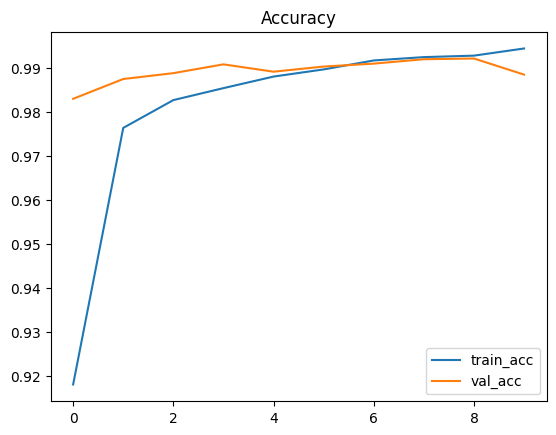

In [13]:
# Accuracy/loss plots
plt.figure()
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend(); plt.title("Accuracy")
plt.savefig("reports/acc_loss.png")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


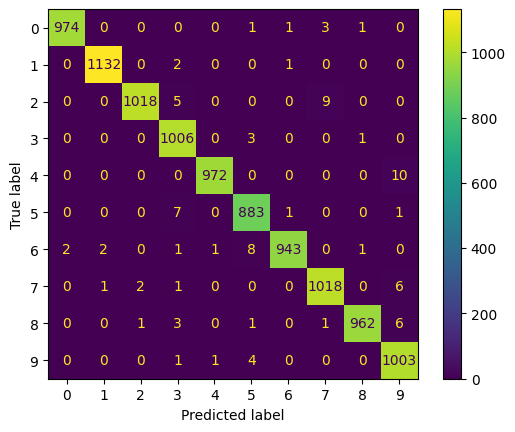

In [14]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis = 1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.savefig("reports/confusion_matrix.png")

In [15]:
# Print accuracy
import json, pprint
with open("reports/metrics.json") as f:
    pprint.pp(json.load(f))

{'test_accuracy': 0.991100013256073, 'test_loss': 0.026600103825330734}
